<a href="https://colab.research.google.com/github/lourdesvera/text_analysis/blob/main/Marx_Text_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marx Text Analysis
Now that you are familiar with the themes across Marx's writings, we are going to compare his early work with his later work in order to get a better idea of how his thoughts developed throughout his life. Make sure you are following along with this [google doc](https://docs.google.com/document/d/1sm51kZBIO6QP364pRaZYDH7UcaReFT0k-XkMzK-jBho/edit#).

For this assignment, you are going to copy then **run this Jupyter Notebook written in Python twice - once for early Marx and another time for late Marx.** 

Then, you can follow directions below to alter some of the code to make your own charts or wordclouds. Finally, you are going to **collect the image outputs from these notebooks in a Word or Google Doc and answer the guiding questions**. These notes and analyses will be the beginning of **your paper for Assessment 1.**

##Using this Notebook
Read these directions **carefully**.

**1. Open the assignment doc and save a copy with your name. You will be turning this in.**

**2. Make a copy of this notebook**
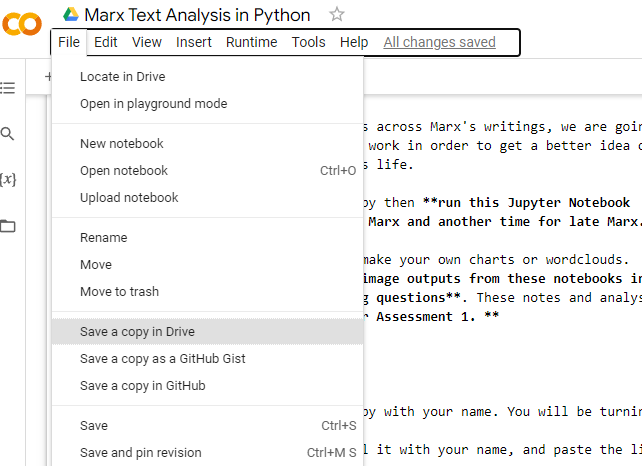



**3. Re-name your notebook copy**




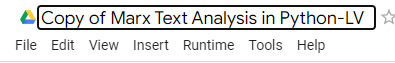


**4. Paste the link into your doc**





##How to Run Notebook
1. Click "connect" and agree to open it if prompted.
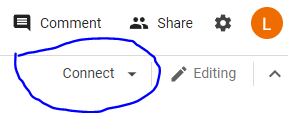
2. Press "play" on your first chunk of code then work down from there.

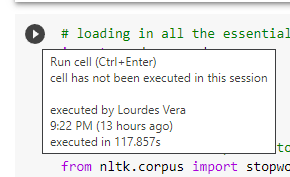

#Import 
We are downloading and loading all of the modules we need to do our analysis. It might take a minute, so be patient. There is a line at the end of the code that prevents this chunk from showing its output since it's so long.

In [2]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#download NTLK 
import nltk
nltk.download('all')
#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base formfrom nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects from collections
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
import string
import io
#for wordclouds
!pip install wordcloud
from wordcloud import WordCloud
import base64
import requests
!pip3 install flair
import flair 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

#Load the Files
Now, we load the text files in the first chunk and choose which analysis we are doing using the dropdown menu in the next chunk.

In [6]:
#load late marx text that is stored in Prof. Vera's GitHub
master1 = "https://raw.githubusercontent.com/lourdesvera/text_analysis/main/texts/latemarx.txt"
late_marx_req = requests.get(master1)
late_marx = late_marx_req.text
#load early marx text stored in Prof. Vera's GitHub
master2 = "https://raw.githubusercontent.com/lourdesvera/text_analysis/main/texts/earlymarx.txt"
early_marx_req = requests.get(master2)
early_marx = early_marx_req.text

In [7]:
#@title Text Choice

Text = early_marx #@param ["late_marx", "early_marx"] {type:"raw"}

# Charts of Top Words
In this section, we look at the top words, top pairs of words, and top three words (trigrams) in the body of work.

Most of this code comes from: https://www.absentdata.com/python-graphs/python-word-frequency/ 

In [8]:
def word_frequency(Text):
# joins all the sentenses
  Text =" ".join(Text)
# creates tokens, creates lower class, removes numbers and lemmatizes the words
new_tokens = word_tokenize(Text)
new_tokens = [t.lower() for t in new_tokens]
new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
new_tokens = [t for t in new_tokens if t.isalpha()]
lemmatizer = WordNetLemmatizer()
new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#counts the words, pairs and trigrams
counted = Counter(new_tokens)
counted_2= Counter(ngrams(new_tokens,2))
counted_3= Counter(ngrams(new_tokens,3))
#creates 3 data frames and returns thems
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)

In [9]:
#Run the above function
word_frequency(Text)

In [10]:
#define each data frame for the charts.
data4 = trigrams
data3 = word_pairs
data2 = word_freq

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

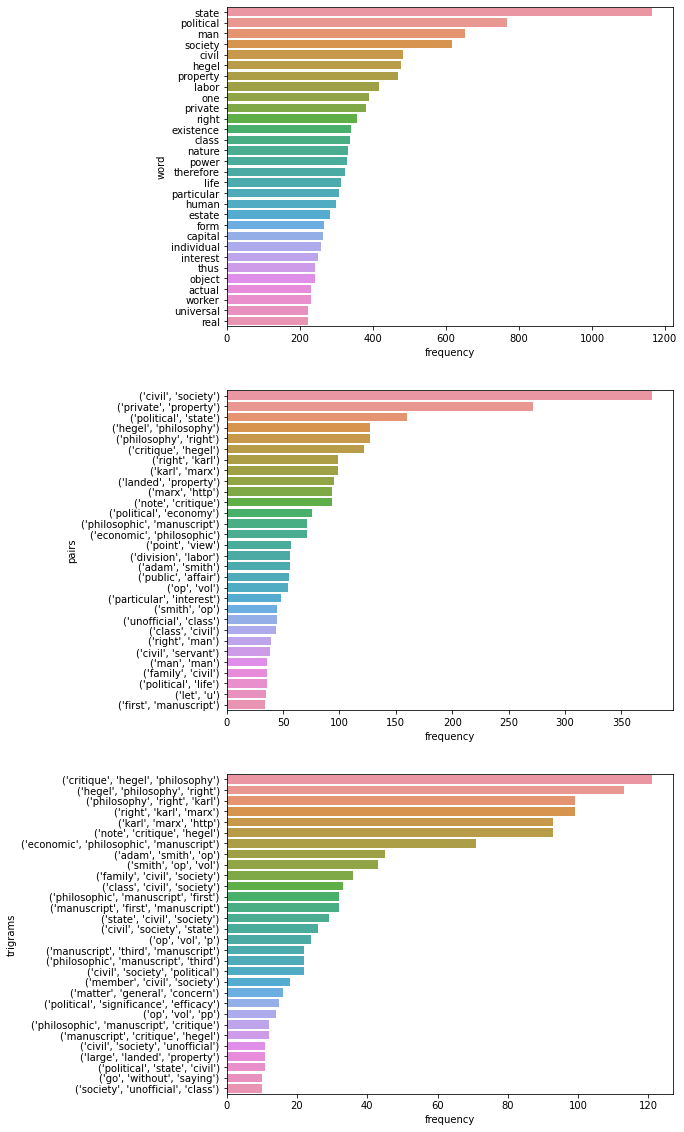

In [11]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0], x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1], x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2], x='frequency',y='trigrams',data=data4.head(30))

#Word Clouds
Now, let's create wordclouds! These show top words, and you can alter them according to aesthetics and the number of words you want them to show.

Most of this code and instructions come from: https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/

In [12]:
#turn text back into string format
wordcloud_text =' '.join(map(str,new_tokens))
print(wordcloud_text)

economic philosophical manuscript already announced jahrbücher critique jurisprudence political science form critique hegelian philosophy law preparing publication intermingling criticism directed speculation criticism various subject proved utterly unsuitable hampering development argument rendering comprehension difficult moreover wealth diversity subject treated could compressed one work purely aphoristic style whilst aphoristic presentation kind part would given impression arbitrary systematism shall therefore publish critique law ethic politics series distinct independent pamphlet afterwards try special work present connected whole showing interrelationship separate part lastly attempt critique speculative elaboration material reason found interconnection political economy state law ethic civil life touched upon present work extent political economy expressly touch upon subject hardly necessary assure reader conversant political economy result attained mean wholly empirical analys

In [13]:
wc = WordCloud().generate(wordcloud_text)

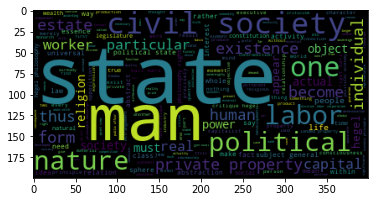

In [14]:
plt.imshow(wc)

## Customize and make it your own

Below is all the code to create and plot in one cell. We do not need to repeat the `import` commands, since the extensions are already loaded. Execute the cell as is and see if you get the same picture. Then read about customizing and keep modifying and executing the cell until you have your perfect word cloud. You can save the image by right clicking on the image with the mouse and selecting save image.

### Changing plot appearence

The following two lines will make the image larger and remove the axes labels. Add them just before `plt.imgshow(wc)`.

> `plt.figure(figsize=(15, 15))`

> `plt.axis("off")`

Add these and see what changes. The next improvement makes the image smoother by changing the `plt.imgshow(wc)` to

> `plt.imshow(wc, interpolation="bilinear")`

Try it.

### Adding options to the word cloud command

In line `wx = WordCloud().generate(wordcloud_text)` you can add options between the first `()`. You can combine these separated by commas. Here are some examples. Modify the command and observe the differences in the resulting word cloud.

> `wc = WordCloud(max_words=15).generate(wordcloud_text)`

> `wc = WordCloud(width=1000, height=1000).generate(wordcloud_text)`

> `wc = WordCloud(width=1000, height=1000, background_color="white").generate(wordcloud_text)`

> `wc = WordCloud(width=1000, height=1000, background_color="white", stopwords=stop_words).generate(wordcloud_text)`

## Have fun.

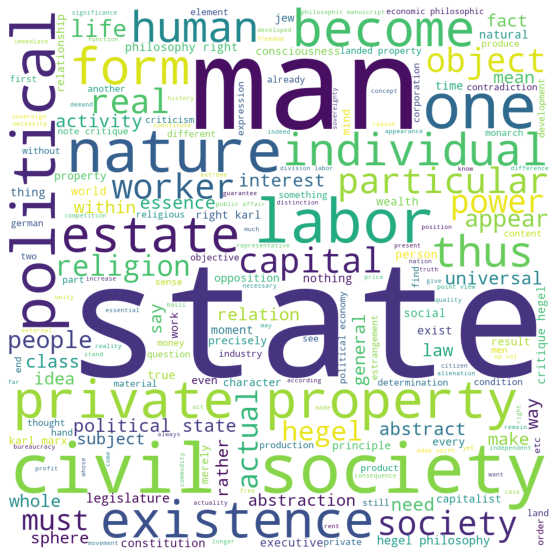

In [15]:
# As you go on, modify the code in this cell to customize your word cloud

wc = WordCloud(width=1000, height=1000, background_color="white").generate(wordcloud_text)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(wc)

#Sentiment Analysis
What kinds of sentiments do the words in the text align with? Positive? Neutral? Negative?

I found the rest of the code for the chunks below at: https://github.com/mohammedterry/NLP_for_ML/blob/master/Sentiment_Analysis.ipynb 

In [16]:
sentence = wordcloud_text

In [17]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("sentence").T,center=0, annot=True, cmap = "PiYG")

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [19]:
sid.polarity_scores(sentence)

{'neg': 0.076, 'neu': 0.774, 'pos': 0.15, 'compound': 1.0}

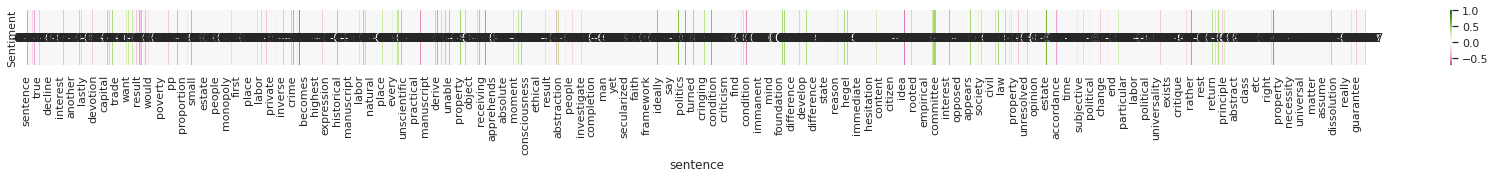

In [20]:
visualise_sentiments({
    "sentence":["sentence"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

## TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob(sentence).sentiment

In [21]:
visualise_sentiments({
      "sentence":["sentence"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
})

NameError: ignored

## Flair

In [ ]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

In [ ]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels

In [ ]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "sentence":["sentence"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})